In [25]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# compute mean.

In [27]:
# get historical daily price for SPY
symbol = 'SPY'

tick = yf.Ticker(symbol)
history = tick.history(period="max")
assert(symbol =='SPY')
vixh=yf.Ticker('^VIX').history(period="max")
df = pd.DataFrame()
df['close'] = history.Close
df['ret']= np.log(df.close).diff()
df['ret_mean'] = df.ret.rolling(21).mean()
df['realized_vol'] = df.ret.rolling(21).std()*np.sqrt(252)*100
df['implied_vol'] = vixh.Close

# compute some more params
# z = (x – μ) / σ

df['z_ret'] = (df.ret_mean-df.ret_mean.mean())/df.ret_mean.std()
df['z_vol'] = (df.realized_vol-df.realized_vol.mean())/df.realized_vol.std()

df = df.dropna()




In [28]:
df

,close,ret,ret_mean,realized_vol,implied_vol,z_ret,z_vol
Date,,,,,,,
1993-03-02,26.673210,0.014711,0.001072,13.124627,12.490000,0.315277,-0.274143
1993-03-03,26.784517,0.004164,0.000932,12.994241,13.130000,0.252873,-0.286675
1993-03-04,26.636116,-0.005556,0.000567,13.176690,13.440000,0.089071,-0.269139
1993-03-05,26.561911,-0.002790,-0.000066,12.708774,14.080000,-0.195001,-0.314113
1993-03-08,27.155470,0.022100,0.000787,14.806403,16.219999,0.187701,-0.112499
...,...,...,...,...,...,...,...
2020-11-10,354.040009,-0.001468,0.000217,21.329980,24.799999,-0.067884,0.514515
2020-11-11,356.670013,0.007401,0.000881,21.319897,23.450001,0.229927,0.513546
2020-11-12,353.209991,-0.009748,0.000717,21.498823,25.350000,0.156373,0.530743


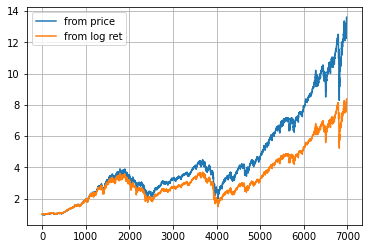

In [29]:
# refresher https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/
# https://quant.stackexchange.com/questions/21092/calculating-log-returns-across-multiple-securities-and-time
norm_price_from_log_ret = np.expand_dims(np.cumprod(df.ret+1),axis=1)
norm_price_from_price = np.expand_dims(df.close.values/df.close.values[0],axis=1)
plt.plot(norm_price_from_price,label='from price')
plt.plot(norm_price_from_log_ret,label='from log ret')
plt.grid(True)
plt.legend()

In [30]:
# 45 days DTE - equates to 45/21 = 2.1 weeks, which is 10 business days
print(45/21)

2.142857142857143


In [ ]:
# https://medium.com/magnimetrics/black-scholes-model-first-steps-bdcbe1691da7

In [6]:
# thus we first determine the Ys which we want to predict
# X will be a vector of historical data, and Y will be the future 10day price change and volatility change.

In [40]:
# dont want to write another black schole function.
# using existing ones based on github project star count
# https://github.com/search?l=Python&o=desc&q=black+schole&s=stars&type=Repositories
# 
# lets be rational - https://jaeckel.000webhostapp.com/LetsBeRational.pdf
# https://github.com/vollib/py_vollib
# https://github.com/boyac/pyOptionPricing


0.07012719851578542
0.037614635845718336


In [7]:
# assuming you put on a position every day, and 

# ,IVR,


#df['vol_change'] = df.vol.pct_change(21).shift(-21)
#df['price_change'] = df.close.pct_change(21).shift(-21)

-0.01653507756904965
[-0.73938052 -0.39998495 -0.27942426 -0.18742817 -0.10688003 -0.01653508
  0.08996544  0.2130862   0.37098963  0.68346094  5.18230485]


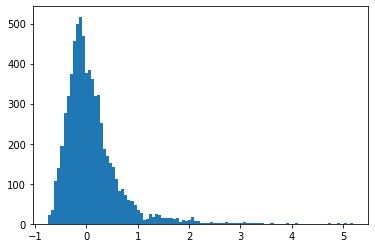

In [8]:
_ = plt.hist(df.vol_change.dropna().values,bins=100)
print(np.nanmedian(df.vol_change))
print(np.nanpercentile(df.vol_change,np.arange(0,110,10)))

0.013577949377963305
[-0.3275129  -0.0451775  -0.02144261 -0.00602195  0.00494458  0.01357795
  0.02204223  0.03068498  0.04007776  0.05563415  0.25185022]


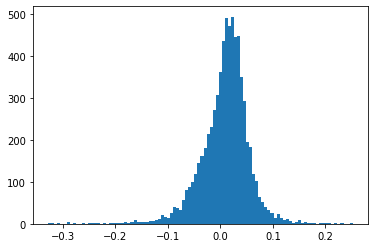

In [9]:
_ = plt.hist(df.price_change.dropna().values,bins=100)
print(np.nanmedian(df.price_change))
print(np.nanpercentile(df.price_change,np.arange(0,110,10)))

In [10]:
df.iloc[-22:]

,close,ret,ret_mean,vol,vol_change,price_change
Date,,,,,,
2020-10-16,347.290009,-0.000604,0.001787,19.141496,0.154955,0.040917
2020-10-19,342.010010,-0.015320,0.001609,19.510911,NaN,NaN
2020-10-20,343.380005,0.003998,0.002332,18.956925,NaN,NaN
2020-10-21,342.730011,-0.001895,0.001759,18.790426,NaN,NaN
2020-10-22,344.609985,0.005470,0.003137,16.420404,NaN,NaN
2020-10-23,345.779999,0.003389,0.003172,16.419686,NaN,NaN
2020-10-26,339.390015,-0.018653,0.001520,17.364976,NaN,NaN
2020-10-27,338.220001,-0.003453,0.000571,16.556045,NaN,NaN
2020-10-28,326.660004,-0.034777,-0.000825,20.537579,NaN,NaN


Text(0, 0.5, '21-day volatility prct change')

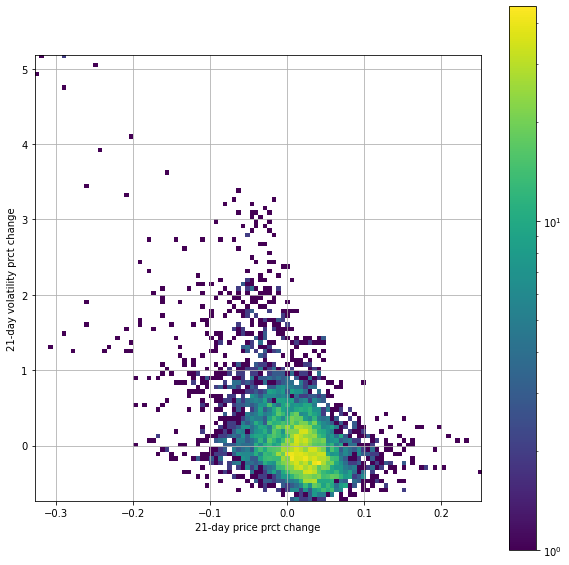

In [11]:
df = df.dropna()
# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
from matplotlib.colors import LogNorm
heatmap, xedges, yedges = np.histogram2d(df.price_change,df.vol_change, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
aspect = (xedges[-1]-xedges[0])/(yedges[-1]-yedges[0])
plt.figure(figsize=(10,10))
cmap = 'viridis' #viridis hot
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect=aspect,norm=LogNorm(),cmap=cmap)
plt.grid(True)
plt.colorbar()
plt.xlabel('21-day price prct change')
plt.ylabel('21-day volatility prct change')

In [12]:
# since both signals are likely mean reverting
# and assuming realized volatility tracks implied volatilityvol_change
# 
# by sectioning the 2 changes to zones, we can accordingly decide what strategy to deploy

# if vol increase, price increase - diagonal - short front month call, long back month call
# if vol increase, price no-change - diagonal - short call strangle, long back month?
# if vol increase, price decrease - diagonal - short front month put, long back month put

# if vol decrease, price increase - short put
# if vol decrease, price no-change - iron condor
# if vol decrease, price decrease - short call

# https://www.youtube.com/watch?v=T6uA_XHunRc, ratios spreads or broken wing butter fly
# if vol no-change, price increase - short put ratio spread
# if vol no-change, price no-change - iron condor ratio spreads?
# if vol no-change, price decrease - short call ratio spread

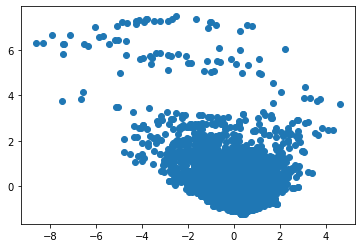

In [24]:
plt.scatter(df.z_ret,df.z_vol)